# Density weighted w per month

In [1]:
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime 
import netCDF4
import scipy.stats as st
import matplotlib as mpl
import matplotlib.colors as colors
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import sys
from Tools_jpdf import*
import matplotlib.patches as mpatches

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50


# TO EDIT 

dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_figures/'
#dir_save = 'figure/'


month = 'feb'
list_month = ['jan','feb', 'mar', 'apr', 'may', 'jun','jul','aug','sep','oct','nov','dec']
HF_C = []
HF_AC = []

for month in list_month:
# JPDF data 
    print(month)

    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
    H_w = np.asfortranarray(nc.variables['H_w'])[:,:,:,:]
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    nc.close()


    xedges = np.arange(-6,6.05,0.05)
    yedges = np.arange(0,6.025,0.025)
    xx, yy = np.meshgrid(xedges[1:], yedges[1:])
    
    tot_flu_w_c= []
    tot_flu_w_ac = []

    for i in range(gap_list.shape[0]):

        H_sum = np.nansum(H[:,:,i,:],axis=2)
        
        H_f_c = np.where(xx > 0.5, H_sum,0)
        H_f_c = np.where(yy > xx, H_f_c,0)
        H_f_c = H_f_c/np.sum(H_f_c)
        
        H_f_ac = np.where(xx < -0.5, H_sum,0)
        H_f_ac = np.where(yy > -xx, H_f_ac,0)
        H_f_ac = H_f_ac/np.sum(H_f_ac)
        
        H_w_mean = np.nanmean(H_w[:,:,i,:],axis=2)
        
        #H_wc_neg = np.where(H_w_mean<0,H_w_mean,0)

        H_f_w_c = np.where(xx > 0.5, H_w_mean,0)
        H_f_w_c = np.where(yy > xx, H_f_w_c,0)

        H_f_w_ac = np.where(xx < -0.5, H_w_mean,0)
        H_f_w_ac = np.where(yy > -xx, H_f_w_ac,0)

        tot_flu_w_c.append(np.nansum(H_f_w_c*H_f_c)*24*3600)
        tot_flu_w_ac.append(np.nansum(H_f_w_ac*H_f_ac)*24*3600)
        
    HF_C.append(tot_flu_w_c)    
    HF_AC.append(tot_flu_w_ac)


jan


<ipython-input-1-43d10bef1c5a>:61: RuntimeWarning: Mean of empty slice
  H_w_mean = np.nanmean(H_w[:,:,i,:],axis=2)


feb
mar
apr
may
jun
jul
aug
sep
oct
nov
dec


# Front density per month

In [2]:
H_f_c_list=[]
H_f_ac_list=[]
H_f_tot_list =[]
PER_MLD_POS = []
PER_MLD_NEG = []

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)
xx, yy = np.meshgrid(xedges[1:], yedges[1:])

for i in range(0,len(list_month)):
        
    month=list_month[i]
    
    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
    H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    nc.close()
    
    H_sum = np.nansum(H[:,:,0,:],axis=2)
    H_sum_norm = H_sum/np.sum(H_sum)
    H_f = np.where(xx > 0.5, H_sum,0)
    H_f = np.where(yy > xx, H_f,0)
    H_f_ac = np.where(xx < -0.5, H_sum,0)
    H_f_ac = np.where(yy > -xx, H_f_ac,0)
    H_f_c_list.append(np.round(np.nansum(H_f)*100/np.nansum(H_sum),decimals=1))
    H_f_ac_list.append(np.round(np.nansum(H_f_ac)*100/np.nansum(H_sum),decimals=1))
    H_f_tot_list.append(np.round(np.nansum(H_f_ac+H_f)*100/np.nansum(H_sum),decimals=1))
    print(month)

jan
feb
mar
apr
may
jun
jul
aug
sep
oct
nov
dec


# w(z) in 1A and 1C

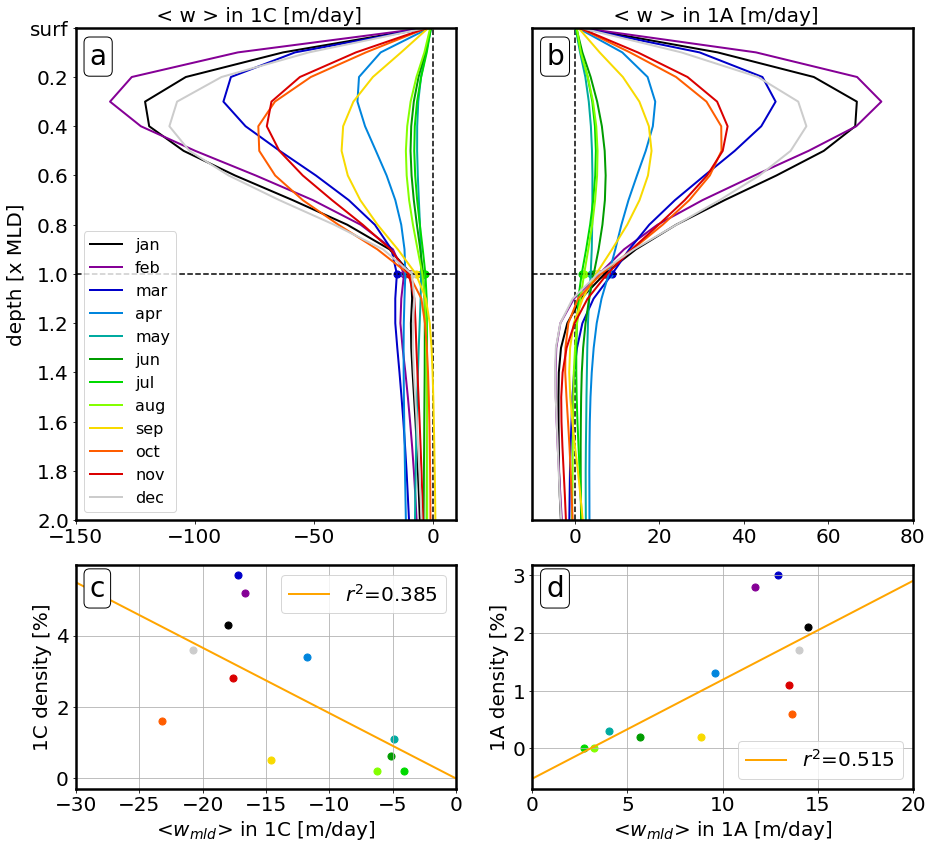

In [3]:
import matplotlib.transforms as mtransforms
from matplotlib.gridspec import GridSpec

cmap_month = plt.cm.nipy_spectral
colors_month = [cmap_month(i) for i in np.linspace(0., 1., 12)] 

title_jpdf = []
for gap in gap_list[:-1]:
    title_jpdf.append('{:.2}'.format(1-gap))
    
title_jpdf.append('surf')


fig = plt.figure(figsize=(15,14))
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[:2, 1])
ax3 = fig.add_subplot(gs[-1, 0])
ax4 = fig.add_subplot(gs[-1, 1])


label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.01, 0.98, label, transform=ax1.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))
    
for i in range(0,len(HF_C)):
    ax1.plot(HF_C[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])
    
for i in range(0,len(HF_C)):
    ax1.scatter(HF_C[i][10],gap_list[10],s=50,color=colors_month[i],marker="o")
    
ax1.tick_params(axis='both',labelsize=20)    
ax1.set_yticks(gap_list[::2])
ax1.set_yticklabels(title_jpdf[::2])
ax1.hlines(0,-150,10,linestyle='--',color='k')
ax1.set_xlim(-150,10)

#ax1.set_xticks()
ax1.set_ylabel('depth [x MLD]',size=20)
ax1.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax1.set_ylim(gap_list[0],gap_list[-1])
ax1.set_title(' < w > in 1C [m/day]   ',size=20)
ax1.legend(prop={'size': 16})
label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax2.text(0.01, 0.98, label, transform=ax2.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(HF_AC)):
    ax2.plot(HF_AC[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax2.scatter(HF_AC[i][10],gap_list[10],s=50,color=colors_month[i],marker="o")
    

ax2.hlines(0,-10,80,linestyle='--',color='k')
ax2.set_xlim(-10,80)

ax2.tick_params(axis='both',labelsize=20)    
ax2.set_yticks([])
#ax2.set_xticks()
#ax2.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax2.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax2.set_ylim(gap_list[0],gap_list[-1])
ax2.set_title(' < w > in 1A [m/day]   ',size=20)



# Correlation


label = 'c'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax3.text(0.01, 0.98, label, transform=ax3.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

W_MLD_C = np.array(HF_C)[:,11]

for i in range(len(colors_month)):
    ax3.scatter(W_MLD_C[i],H_f_c_list[i],s=50,color=colors_month[i])
    
coefficients,residuals,rank,singular_values,rcond = np.polyfit(W_MLD_C,H_f_c_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_f_c_list - np.mean(H_f_c_list))**2))
x = np.linspace(-30,0)
y_pred = np.polyval(coefficients, x)

#ax3.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax3.tick_params(axis='both',labelsize=20)    
ax3.plot(x, y_pred, color='orange', label='$r^2$={0:.3f}'.format(regress_coef[0]),linewidth=2)
ax3.legend()
ax3.set_ylabel("1C density [%]",size=20)
ax3.set_xlabel("<$w_{mld}$> in 1C [m/day]",size=20)
ax3.legend(prop={'size': 20})
ax3.grid()
ax3.set_xlim(-30,0)
#ax3.set_ylim(0,10)

W_MLD_AC = np.array(HF_AC)[:,11]

label = 'd'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax4.text(0.01, 0.98, label, transform=ax4.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


for i in range(len(colors_month)):
    ax4.scatter(W_MLD_AC[i],H_f_ac_list[i],s=50,color=colors_month[i])
    
coefficients,residuals,rank,singular_values,rcond = np.polyfit(W_MLD_AC,H_f_ac_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_f_ac_list - np.mean(H_f_ac_list))**2))
x = np.linspace(0,20)
y_pred = np.polyval(coefficients, x)

#ax4.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax4.tick_params(axis='both',labelsize=20)    
ax4.plot(x, y_pred, color='orange', label='$r^2$={0:.3f}'.format(regress_coef[0]),linewidth=2)
ax4.legend()
ax4.set_ylabel("1A density [%]",size=20)
ax4.set_xlabel("<$w_{mld}$> in 1A [m/day]",size=20)
ax4.legend(prop={'size': 20},loc=4)
ax4.grid()
ax4.set_xlim(0,20)



dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/figures/'
#plt.savefig(dir_save+"w_mean_vertical_and_correlation.png",dpi = 200,bbox_inches='tight')